In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2025-sep-dl-gen-ai-project/sample_submission.csv
/kaggle/input/2025-sep-dl-gen-ai-project/train.csv
/kaggle/input/2025-sep-dl-gen-ai-project/test.csv


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/kaggle/input/2025-sep-dl-gen-ai-project/train.csv")
dt = pd.read_csv("/kaggle/input/2025-sep-dl-gen-ai-project/test.csv")  # structure may vary
sub = pd.read_csv("/kaggle/input/2025-sep-dl-gen-ai-project/sample_submission.csv")

df.head()

id                                               text  anger  fear  joy  \
0   0  the dentist that did the work apparently did a...      1     0    0   
1   1  i'm gonna absolutely ~~suck~~ be terrible duri...      0     1    0   
2   2  bridge: so leave me drowning calling houston, ...      0     1    0   
3   3  after that mess i went to see my now ex-girlfr...      1     1    0   
4   4  as he stumbled i ran off, afraid it might some...      0     1    0   

   sadness  surprise                    emotions  
0        1         0         ['anger' 'sadness']  
1        1         0          ['fear' 'sadness']  
2        1         0          ['fear' 'sadness']  
3        1         0  ['anger' 'fear' 'sadness']  
4        0         0                    ['fear']

In [18]:
# Define all possible emotions
emotion_cols = ["anger", "fear", "joy", "sadness", "surprise"]

In [19]:
#Training set
print("Train")
print(df.shape)
df.isnull().sum()

Train
(6827, 8)


id          0
text        0
anger       0
fear        0
joy         0
sadness     0
surprise    0
emotions    0
dtype: int64

In [20]:
# Test set
print("Test")
print(dt.shape)
dt.isnull().sum()

Test
(1707, 2)


id      0
text    0
dtype: int64

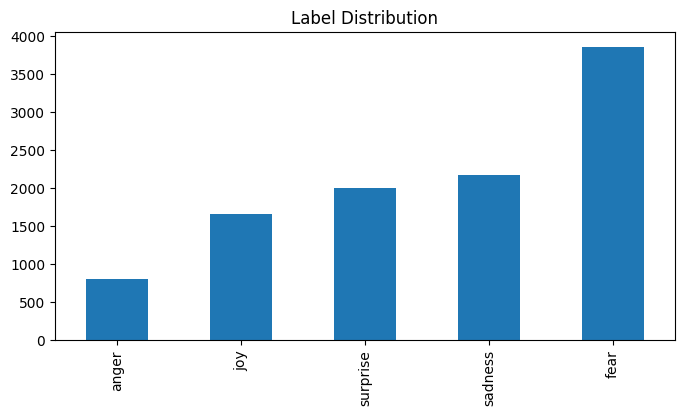

In [21]:
# Count per emotion
df[emotion_cols].sum().sort_values().plot(kind="bar", figsize=(8,4))
plt.title("Label Distribution")
plt.show()

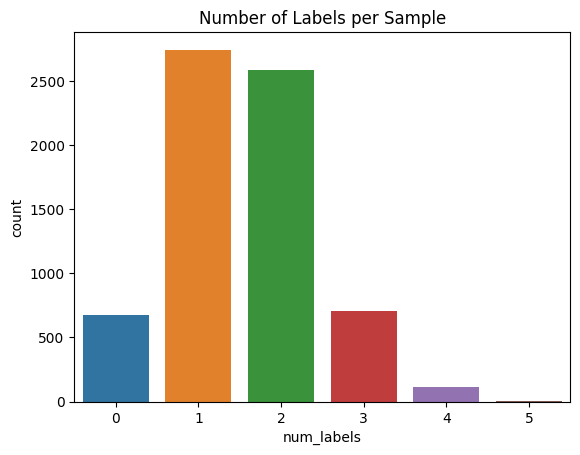

In [22]:
df["num_labels"] = df[emotion_cols].sum(axis=1)

sns.countplot(x="num_labels", data=df)
plt.title("Number of Labels per Sample")
plt.show()

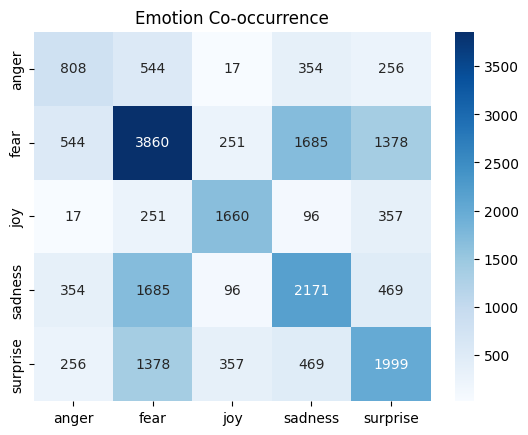

In [23]:
co_matrix = df[emotion_cols].T.dot(df[emotion_cols])
sns.heatmap(co_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Emotion Co-occurrence")
plt.show()

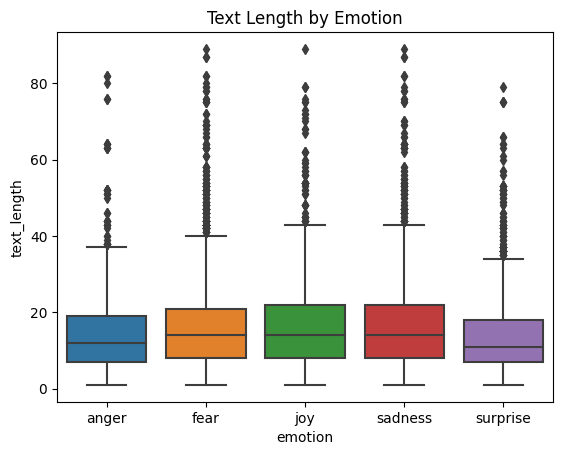

In [24]:
df['text_length'] = df['text'].str.split().apply(len)
melted = df.melt(id_vars=['text_length'], value_vars=emotion_cols, var_name='emotion', value_name='present')
sns.boxplot(data=melted[melted['present']==1], x='emotion', y='text_length')
plt.title('Text Length by Emotion')
plt.show()

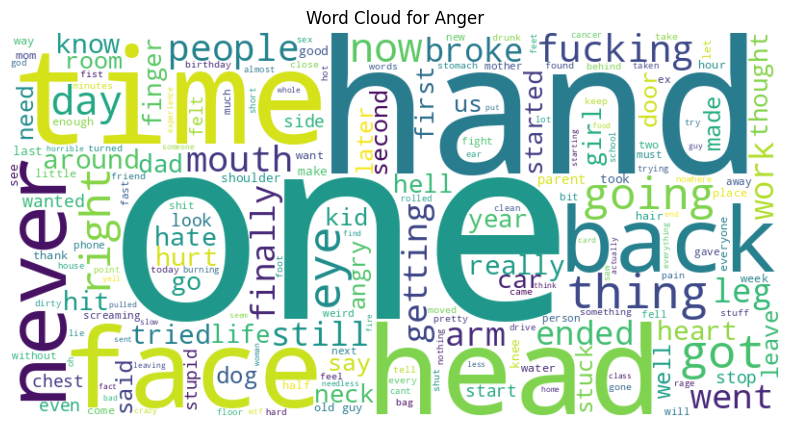

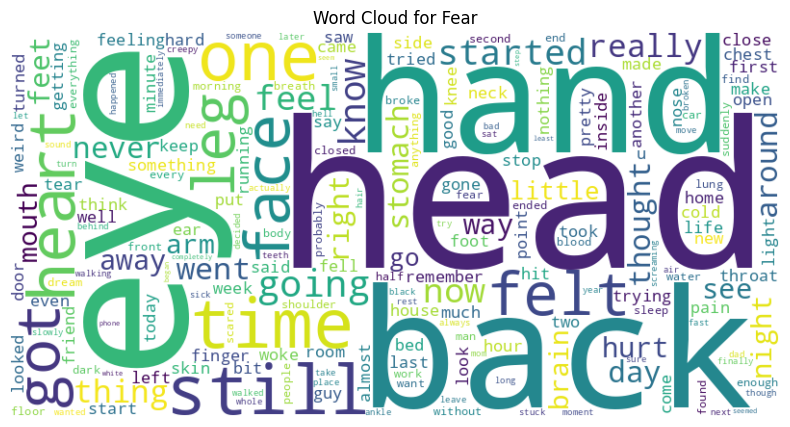

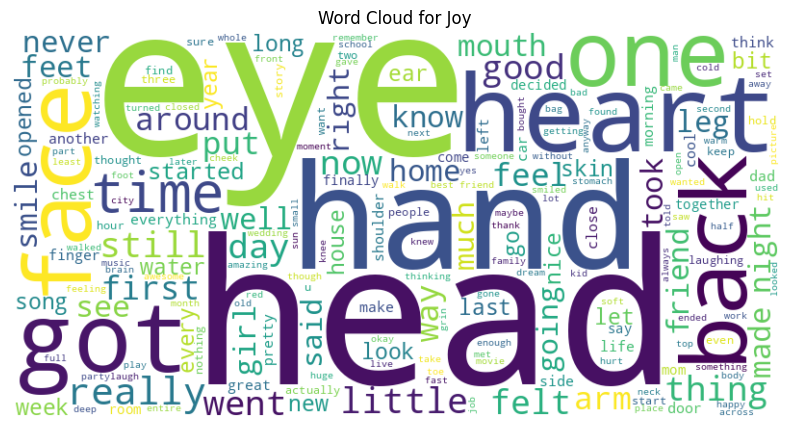

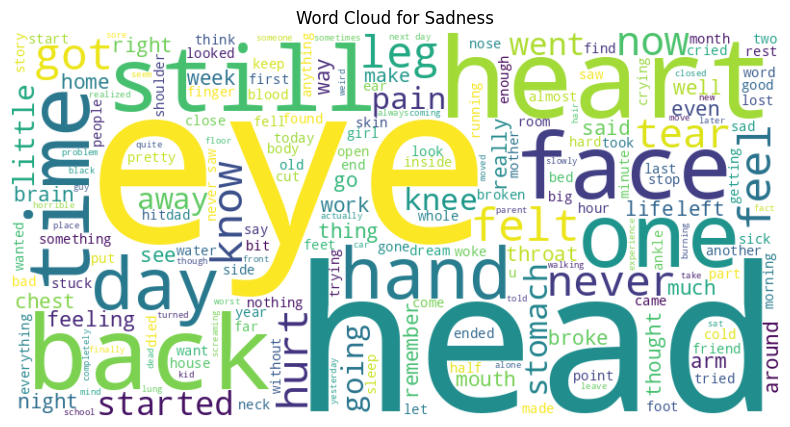

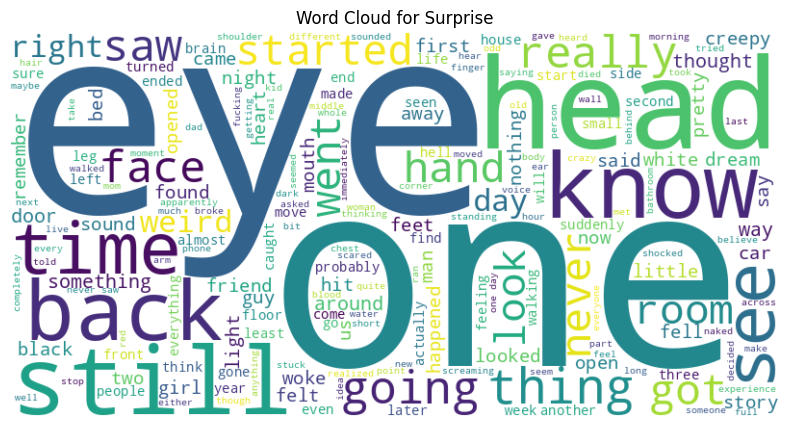

In [25]:
from wordcloud import WordCloud

for emotion in emotion_cols:
    texts = df[df[emotion]==1]['text'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion.capitalize()}')
    plt.show()

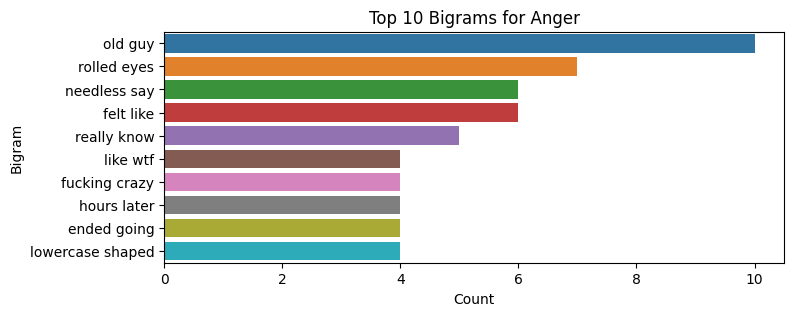

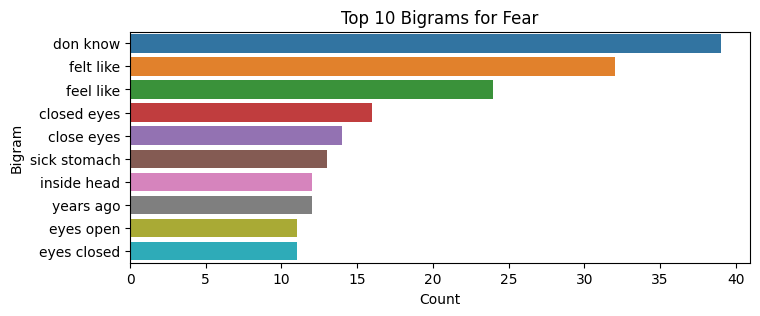

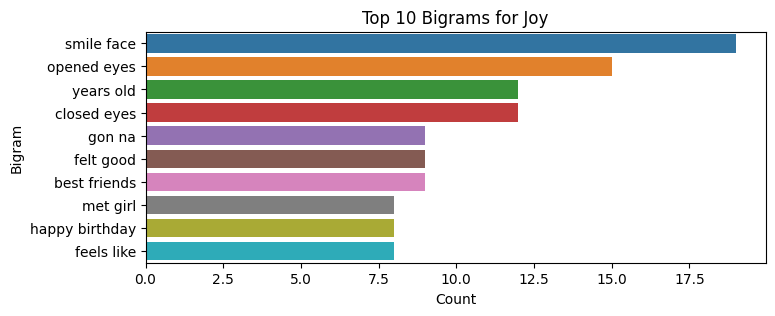

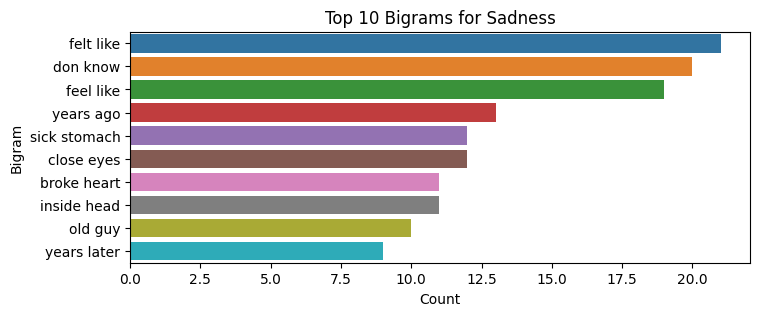

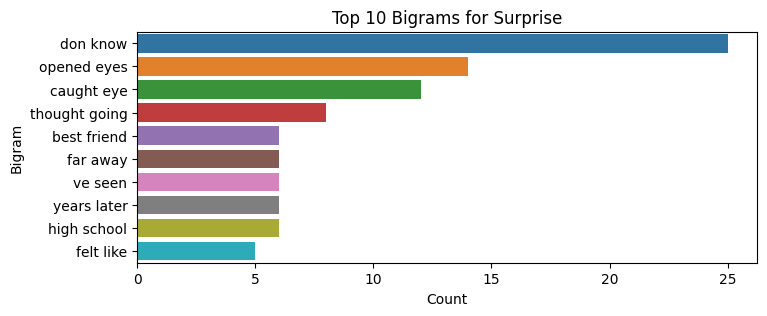

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

for emotion in emotion_cols:
    texts = df[df[emotion]==1]['text'].fillna('')
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
    X = vectorizer.fit_transform(texts)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]
    bigrams, counts = zip(*words_freq) if words_freq else ([], [])
    plt.figure(figsize=(8,3))
    sns.barplot(x=list(counts), y=list(bigrams))
    plt.title(f'Top 10 Bigrams for {emotion.capitalize()}')
    plt.xlabel('Count')
    plt.ylabel('Bigram')
    plt.show()